In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.feature import peak_local_max
from skimage import img_as_ubyte

In [2]:
# Region Growing Function
def region_growing(image, seeds, threshold=20):
    h, w = image.shape[:2]
    visited = np.zeros((h, w), dtype=bool)
    segmented = np.zeros((h, w), dtype=np.uint8)
    seed_intensity = image[seeds[0][1], seeds[0][0]]  # y, x
    queue = [seeds[0]]  # List of (x, y) tuples

    while queue:
        x, y = queue.pop(0)
        if visited[y, x]:
            continue
        
        current_intensity = image[y, x]
        if abs(int(current_intensity) - int(seed_intensity)) <= threshold:
            segmented[y, x] = 255
            visited[y, x] = True

            # Add 4-neighbors (N, S, E, W)
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < w and 0 <= ny < h and not visited[ny, nx]:
                    queue.append((nx, ny))
    return segmented

(np.float64(-0.5), np.float64(1599.5), np.float64(899.5), np.float64(-0.5))

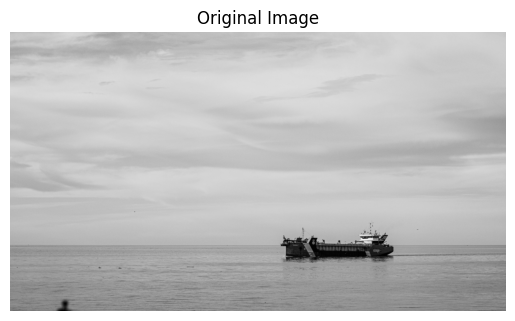

In [3]:
# Load image using dialog
root = tk.Tk()
root.withdraw()
file_path = filedialog.askopenfilename(
    title="Select an image file",
    filetypes=[("Image files", "*.png;*.jpg;*.jpeg;*.bmp")]
)
org_image = cv2.imread(file_path)
#image = cv2.cvtColor(org_image, cv2.COLOR_BGR2RGB)

plt.title("Original Image")
plt.imshow(org_image)
plt.axis('off')

(np.float64(-0.5), np.float64(1599.5), np.float64(899.5), np.float64(-0.5))

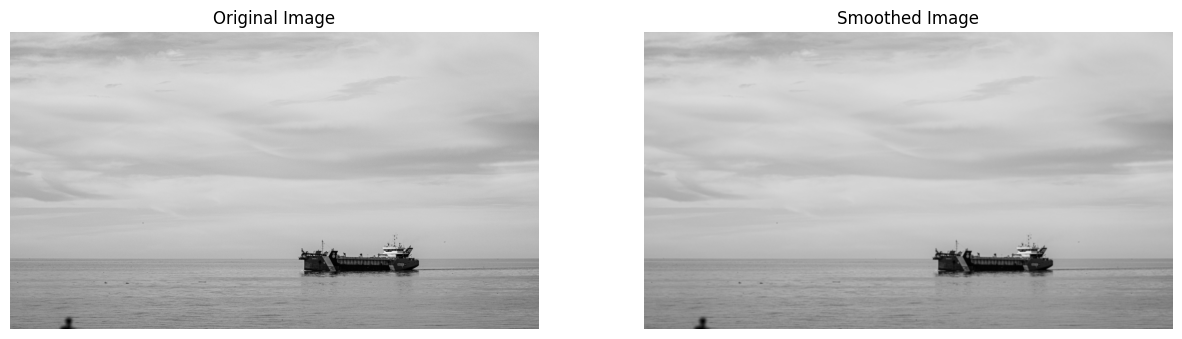

In [4]:
# Preprocessing (blur)
smoothed_image = gaussian(org_image, sigma=1, channel_axis=-1)
smoothed_image = img_as_ubyte(smoothed_image)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1);plt.title("Original Image");plt.imshow(org_image);plt.axis('off')
plt.subplot(1, 2, 2);plt.title("Smoothed Image");plt.imshow(smoothed_image);plt.axis('off')

In [5]:
# Get multiple seed points
gray = cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2GRAY)
seeds = [(100, 100)] 
# Run region growing with colors
segmented_image = region_growing(gray, seeds, threshold=20)

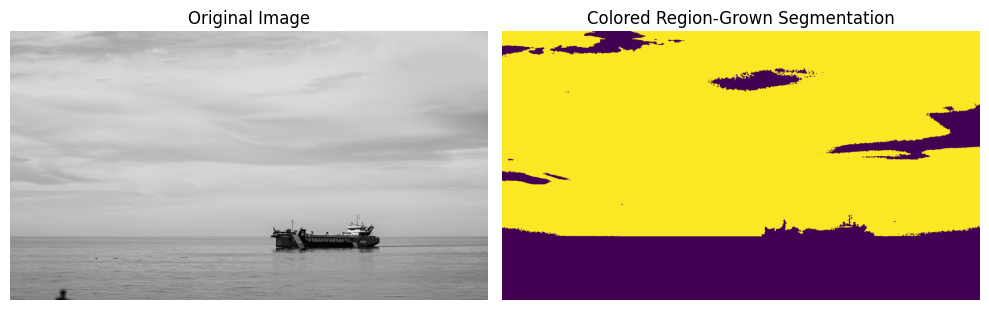

In [7]:
# Show original and result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(org_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Colored Region-Grown Segmentation")
plt.imshow(segmented_image)
plt.axis('off')

plt.tight_layout()
plt.show()
